In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
pd.set_option('display.max_columns',500)

# Reading the clean and merged Dataset

In [236]:
df=pd.read_csv(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/final_data_avg_SC_scores.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (74,91,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [237]:
df.shape

(14356, 130)

In [238]:
df.isnull().sum()

date                         0
asin                         0
year                         0
weeknum                      0
fiscal_year                  0
                         ...  
qna_answered                 0
summary_pr_translated    12356
text_pr_translated       12328
text_sentiment_sc            0
summary_sentiment_sc         0
Length: 130, dtype: int64

In [239]:
df.head()

date        asin  year  weeknum  fiscal_year  fiscal_month  \
0  20-12-2020  B000W6PY1W  2020       51         2020            12   
1  20-12-2020  B071936B11  2020       51         2020            12   
2  20-12-2020  B075KJBF9H  2020       51         2020            12   
3  20-12-2020  B07BVW522M  2020       51         2020            12   
4  20-12-2020  B07JMXSSYN  2020       51         2020            12   

   first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
0                         240.7                              210.85   
1                         197.6                              173.04   
2                         326.9                              286.26   
3                         227.5                              199.25   
4                          14.7                               12.91   

   first_party_ordered_units_vc  average_sales_price_vc  \
0                            59                     3.6   
1                            14                    12.4   
2                            18                    15.9   
3                            25                     8.0   
4                             1                    12.9   

   first_party_shipped_sales_vc  shipped_cogs_amount_vc  \
0                         33.95                   47.67   
1                        119.85                  107.40   
2                         59.05                   59.44   
3                        127.91                  145.28   
4                         38.73                   34.07   

   first_party_shipped_units_vc  customer_return_vc  free_replacements_vc  \
0                             9                   0                     0   
1                            10                   0                     0   
2                             4                   0                     0   
3                            16                   0                     0   
4                             3                   0                     0   

   preordered_revenue_amount_vc  preordered_units_vc  \
0                             0                  0.0   
1                             0                  0.0   
2                             0                  0.0   
3                             0                  0.0   
4                             0                  0.0   

   shipped_subcategory_sales_rank_vc  ordered_subcategory_sales_rank_vc  \
0                              550.0                              172.0   
1                              165.0                              289.0   
2                              343.0                             2246.0   
3                              151.0                              209.0   
4                              505.0                             1148.0   

   replenishable_out_of_stock_vc  lost_buy_box_vc  glance_views_vc  \
0                         0.0000            0.000              362   
1                         0.0000            0.012               83   
2                         0.0000            0.000              114   
3                         0.0144            0.003              341   
4                         0.0000            0.000               19   

   conversion_rate_vc  net_received_amount_vc  net_received_units_vc  \
0              0.1630                     0.0                    0.0   
1              0.1687                     0.0                    0.0   
2              0.1579                     0.0                    0.0   
3              0.0733                     0.0                    0.0   
4              0.0526                     0.0                    0.0   

   open_purchase_order_quantity_vc  inventory_sell_through_rate_vc  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                          

In [240]:
df.describe()

year       weeknum   fiscal_year  fiscal_month  \
count  14356.000000  14356.000000  14356.000000  14356.000000   
mean    2021.329479     22.509264   2021.321120      5.721649   
std        0.509305     14.790693      0.515833      3.415902   
min     2020.000000      0.000000   2020.000000      1.000000   
25%     2021.000000     10.000000   2021.000000      3.000000   
50%     2021.000000     20.000000   2021.000000      5.000000   
75%     2022.000000     34.000000   2022.000000      9.000000   
max     2022.000000     52.000000   2022.000000     12.000000   

       first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
count                  14356.000000                        14356.000000   
mean                     203.264830                          169.353275   
std                      258.122373                          214.909334   
min                     -705.700000                         -579.740000   
25%                       57.300000                           47.820000   
50%                      133.000000                          110.780000   
75%                      278.175000                          231.717500   
max                     6150.700000                         5104.840000   

       first_party_ordered_units_vc  average_sales_price_vc  \
count                  14356.000000            14013.000000   
mean                      31.127682                7.169193   
std                       47.928680                4.743424   
min                     -154.000000               -4.600000   
25%                        7.000000                4.000000   
50%                       18.000000                4.200000   
75%                       38.000000                8.600000   
max                     1107.000000               28.200000   

       first_party_shipped_sales_vc  shipped_cogs_amount_vc  \
count                   14356.00000            14356.000000   
mean                      159.93225              169.353063   
std                       190.46126              215.807587   
min                         0.00000                0.000000   
25%                        41.60000               42.020000   
50%                        99.84000              101.535000   
75%                       221.64750              225.420000   
max                      4190.94000             3826.220000   

       first_party_shipped_units_vc  customer_return_vc  free_replacements_vc  \
count                  14356.000000        14356.000000          14356.000000   
mean                      29.507593            0.481610              0.094316   
std                       40.249814            2.317684              0.383961   
min                        0.000000            0.000000              0.000000   
25%                        7.000000            0.000000              0.000000   
50%                       16.000000            0.000000              0.000000   
75%                       36.000000            1.000000              0.000000   
max                      839.000000          144.000000              7.000000   

       preordered_revenue_amount_vc  preordered_units_vc  \
count                       14356.0              11383.0   
mean                            0.0                  0.0   
std                             0.0                  0.0   
min                             0.0                  0.0   
25%                             0.0                  0.0   
50%                             0.0                  0.0   
75%                             0.0                  0.0   
max                             0.0                  0.0   

       shipped_subcategory_sales_rank_vc  ordered_subcategory_sales_rank_vc  \
count                       13803.000000                       14269.000000   
mean                          349.906035                         553.816946   
std                           422.935924                         599.426858   
min                           

In [241]:
# drop preordered_revenue_amount_vc
#dropping variables with 0 or close to 0 variance

df.drop(['preordered_revenue_amount_vc','preordered_units_vc','lost_buy_box_vc',
        'inventory_sell_through_rate_vc','add_on_item_pr','prime_exclusive_pr','author_artist_vc',
        'compliance_manually_changed_pr','text_pr_translated','summary_pr_translated'],axis=1,inplace=True)

In [242]:
df.shape

(14356, 120)

# Checking Missing Values and Outliers

In [188]:
miss=df.isnull().sum()/len(df)

In [189]:
with pd.option_context("display.max_rows", None):
    display(miss)

date                                                                          0.000000
asin                                                                          0.000000
year                                                                          0.000000
weeknum                                                                       0.000000
fiscal_year                                                                   0.000000
fiscal_month                                                                  0.000000
first_party_ordered_sales_vc                                                  0.000000
first_party_ordered_sales_local_vc                                            0.000000
first_party_ordered_units_vc                                                  0.000000
average_sales_price_vc                                                        0.023892
first_party_shipped_sales_vc                                                  0.000000
shipped_cogs_amount_vc                     

Dropping Varibales with more than 50% of missing values

In [243]:
df.drop(['promotion_price_pr','promo_type_pr','unique_pr','manufacturer_comment_pr',
        'has_image_pr'],axis=1,inplace=True)

In [244]:
df.shape

(14356, 115)

In [245]:
miss1=df.isnull().sum()

In [246]:
with pd.option_context("display.max_rows", None):
    display(df.isnull().sum())

date                                                                              0
asin                                                                              0
year                                                                              0
weeknum                                                                           0
fiscal_year                                                                       0
fiscal_month                                                                      0
first_party_ordered_sales_vc                                                      0
first_party_ordered_sales_local_vc                                                0
first_party_ordered_units_vc                                                      0
average_sales_price_vc                                                          343
first_party_shipped_sales_vc                                                      0
shipped_cogs_amount_vc                                                      

In [194]:
with pd.option_context("display.max_rows", None):
    display(miss1)

date                                                                              0
asin                                                                              0
year                                                                              0
weeknum                                                                           0
fiscal_year                                                                       0
fiscal_month                                                                      0
first_party_ordered_sales_vc                                                      0
first_party_ordered_sales_local_vc                                                0
first_party_ordered_units_vc                                                      0
average_sales_price_vc                                                          343
first_party_shipped_sales_vc                                                      0
shipped_cogs_amount_vc                                                      

In [247]:
#dropping variables which are irrelevant
df.drop(['brand_code_vc','brand_vc','parent_manufacturer_code_vc','manufacturer_code_vc'],axis=1,inplace=True)

In [248]:
df.shape

(14356, 111)

# Segregating Categorical and Numerical Features

In [249]:
df_categorical = df.select_dtypes(include='object')
df_categorical.shape

(14356, 47)

In [250]:
df_categorical.head()

date        asin      gsr_level_2 isavc_vc isprofitero_pr  \
0  20-12-2020  B000W6PY1W  Acne Treatments      Yes            Yes   
1  20-12-2020  B071936B11        Cleansers      Yes            Yes   
2  20-12-2020  B075KJBF9H     Moisturisers      Yes            Yes   
3  20-12-2020  B07BVW522M     Moisturisers      Yes            Yes   
4  20-12-2020  B07JMXSSYN        Cleansers      Yes            Yes   

  first_party_ordered_sales_currency_code_vc  \
0                                        USD   
1                                        USD   
2                                        USD   
3                                        USD   
4                                        USD   

  first_party_ordered_sales_local_currency_code_vc  \
0                                              EUR   
1                                              EUR   
2                                              EUR   
3                                              EUR   
4                                              EUR   

  first_party_shipped_sales_currency_code_vc shipped_cogs_currency_code_vc  \
0                                        EUR                           EUR   
1                                        EUR                           EUR   
2                                        EUR                           EUR   
3                                        EUR                           EUR   
4                                        EUR                           EUR   

  preordered_revenue_currency_code_vc net_received_amount_currency_code_vc  \
0                                 EUR                                  EUR   
1                                 EUR                                  EUR   
2                                 EUR                                  EUR   
3                                 EUR                                  EUR   
4                                 EUR                                  EUR   

  sellable_on_hand_inventory_currency_code_vc  \
0                                         EUR   
1                                         EUR   
2                                         EUR   
3                                         EUR   
4                                         EUR   

  sellable_on_hand_amount_trailing_30_day_average_currency_code_vc  \
0                                                EUR                 
1                                                EUR                 
2                                                EUR                 
3                                                EUR                 
4                                                EUR                 

  unsellable_on_hand_inventory_currency_code_vc  \
0                                           EUR   
1                                           EUR   
2                                           EUR   
3                                           EUR   
4                                           EUR   

  unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc  \
0                                                EUR                   
1                                                EUR                   
2                                                EUR                   
3                                                EUR                   
4                                                EUR                   

  aged_90_plus_days_sellable_inventory_currency_code_vc  \
0                                                EUR      
1                                                EUR      
2                                                EUR      
3                                                EUR      
4                                                EUR      

  aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc  \
0                                                EUR                           
1                                                EUR             

In [251]:
df_numerical=df.select_dtypes(exclude='object')
df_numerical.shape

(14356, 64)

In [252]:
df_numerical.head()

year  weeknum  fiscal_year  fiscal_month  first_party_ordered_sales_vc  \
0  2020       51         2020            12                         240.7   
1  2020       51         2020            12                         197.6   
2  2020       51         2020            12                         326.9   
3  2020       51         2020            12                         227.5   
4  2020       51         2020            12                          14.7   

   first_party_ordered_sales_local_vc  first_party_ordered_units_vc  \
0                              210.85                            59   
1                              173.04                            14   
2                              286.26                            18   
3                              199.25                            25   
4                               12.91                             1   

   average_sales_price_vc  first_party_shipped_sales_vc  \
0                     3.6                         33.95   
1                    12.4                        119.85   
2                    15.9                         59.05   
3                     8.0                        127.91   
4                    12.9                         38.73   

   shipped_cogs_amount_vc  first_party_shipped_units_vc  customer_return_vc  \
0                   47.67                             9                   0   
1                  107.40                            10                   0   
2                   59.44                             4                   0   
3                  145.28                            16                   0   
4                   34.07                             3                   0   

   free_replacements_vc  shipped_subcategory_sales_rank_vc  \
0                     0                              550.0   
1                     0                              165.0   
2                     0                              343.0   
3                     0                              151.0   
4                     0                              505.0   

   ordered_subcategory_sales_rank_vc  replenishable_out_of_stock_vc  \
0                              172.0                         0.0000   
1                              289.0                         0.0000   
2                             2246.0                         0.0000   
3                              209.0                         0.0144   
4                             1148.0                         0.0000   

   glance_views_vc  conversion_rate_vc  net_received_amount_vc  \
0              362              0.1630                     0.0   
1               83              0.1687                     0.0   
2              114              0.1579                     0.0   
3              341              0.0733                     0.0   
4               19              0.0526                     0.0   

   net_received_units_vc  open_purchase_order_quantity_vc  \
0                    0.0                              0.0   
1                    0.0                              0.0   
2                    0.0                              0.0   
3                    0.0                              0.0   
4                    0.0                              0.0   

   sellable_on_hand_inventory_amount_vc  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   sellable_on_hand_amount_trailing_30_day_average_amount_vc  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   sellable_on_hand_units_vc  unsellable_on_hand_inventory_amount_vc  \
0  

Adding all these variables in categorical variables, wrongly identified in numerical variables

In [253]:
df_categorical.columns

Index(['date', 'asin', 'gsr_level_2', 'isavc_vc', 'isprofitero_pr',
       'first_party_ordered_sales_currency_code_vc',
       'first_party_ordered_sales_local_currency_code_vc',
       'first_party_shipped_sales_currency_code_vc',
       'shipped_cogs_currency_code_vc', 'preordered_revenue_currency_code_vc',
       'net_received_amount_currency_code_vc',
       'sellable_on_hand_inventory_currency_code_vc',
       'sellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
       'unsellable_on_hand_inventory_currency_code_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
       'aged_90_plus_days_sellable_inventory_currency_code_vc',
       'aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc',
       'unhealthy_inventory_currency_code_vc', 'selling_program_name_vc',
       'availability_pr', 'third_party_seller_pr', 'parent_asin_vc',
       'isbn_13_vc', 'binding_vc', 'sitb_vc', 'clothing_size_vc',
       'product_group

In [254]:
#Some features are categorical and have been wrongly identified in numerical data frame. Finally, 
#Adding all categorical features together in categorical df and dropping those from numerical df.

df_categorical=df[['date', 'asin', 'gsr_level_2', 'isavc_vc', 'isprofitero_pr',
       'first_party_ordered_sales_currency_code_vc',
       'first_party_ordered_sales_local_currency_code_vc',
       'first_party_shipped_sales_currency_code_vc',
       'shipped_cogs_currency_code_vc', 'preordered_revenue_currency_code_vc',
       'net_received_amount_currency_code_vc',
       'sellable_on_hand_inventory_currency_code_vc',
       'sellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
       'unsellable_on_hand_inventory_currency_code_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
       'aged_90_plus_days_sellable_inventory_currency_code_vc',
       'aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc',
       'unhealthy_inventory_currency_code_vc', 'selling_program_name_vc',
       'availability_pr', 'third_party_seller_pr', 'parent_asin_vc',
       'isbn_13_vc', 'binding_vc', 'sitb_vc', 'clothing_size_vc',
       'product_group_vc', 'replenishment_code_vc', 'model_style_number_vc',
       'colour_vc', 'prep_instructions_required_vc',
       'prep_instructions_vendor_state_vc', 'local_currency',
       'target_currency', 'match_type_pr', 'sponsored_pr',
       'third_party_only_pr', 'amazon_choice_pr', 'amazon_bestseller_pr',
       'prime_pantry_pr', 'amazon_subscribe_and_save_pr', 'amazon_prime_pr',
       'amazon_addon_item_pr', 'type_pr', 'condition_pr', 'critical_pr',
       'customer_product_pr','free_replacements_vc','first_party_won_buy_box_pr',
        'colour_count_vc','number_of_images_pr','isinventory_vc','issales_vc',
        'useful_ratings_negative','useful_ratings_positive','feature_wise_rating',
        'qna_answered','item_to_consider']]

Dropping all variables added in categorical df in numerical columns

In [255]:
df_numerical.drop(['free_replacements_vc','first_party_won_buy_box_pr',
        'colour_count_vc','number_of_images_pr','isinventory_vc','issales_vc',
        'useful_ratings_negative','useful_ratings_positive','feature_wise_rating',
        'qna_answered','item_to_consider'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [256]:
df_categorical.shape,df_numerical.shape

((14356, 58), (14356, 53))

In [257]:
df_categorical.issales_vc.value_counts()

True    14356
Name: issales_vc, dtype: int64

Dropping is_sales_vc because it has only 1 category and has no relevance to the model

In [258]:
df_categorical.drop('issales_vc',axis=1,inplace=True)

In [207]:
df_categorical.shape

(14356, 57)

In [208]:
df_numerical.shape

(14356, 53)

# Data Pre-processing

###Missing Value Imputation and Outlier Treatment

1. Imputing Numerical Features with Median
2. Imputing Missing Categorical Features with Mode
3. Imputing Categorical Features with Frequencies

Outlier Treatment: Capping Outlier within the range of 0.10 to 0.90



# Handling Missings & Outliers for Numerical Features

In [259]:
def missing_num(x):
    x[x==999] = np.nan
    x = x.fillna(x.median())
    return x

#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.90), lower =x.quantile(0.10) )
    return x

In [260]:
df_numerical=df_numerical.apply(missing_num)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


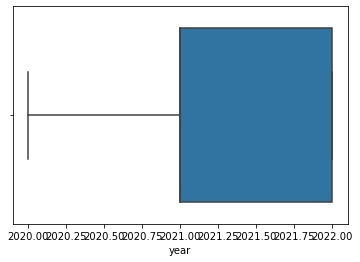

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


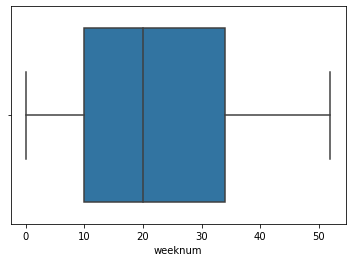

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


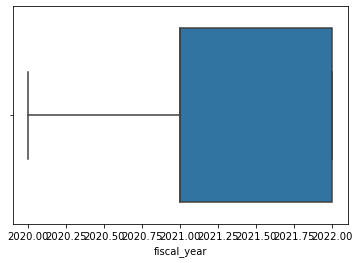

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


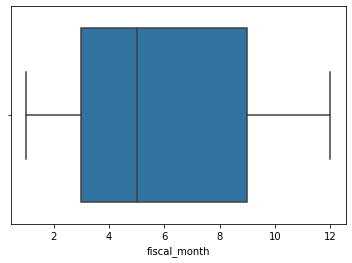

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


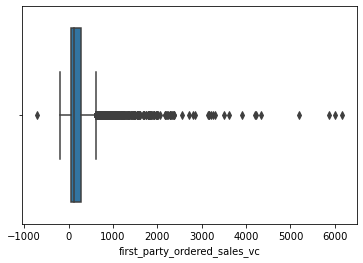

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


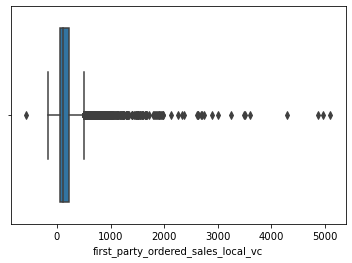

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


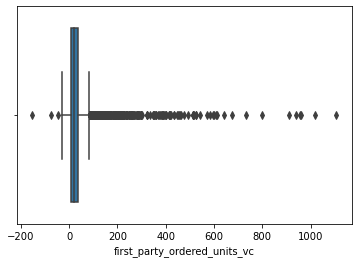

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


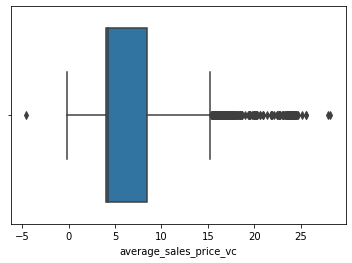

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


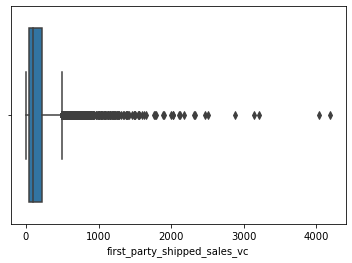

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


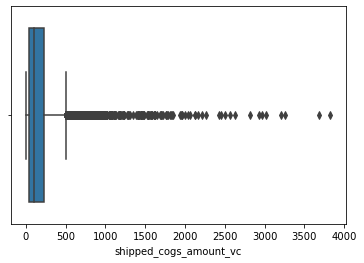

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


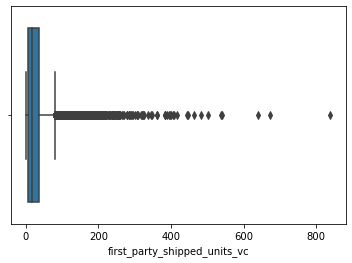

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


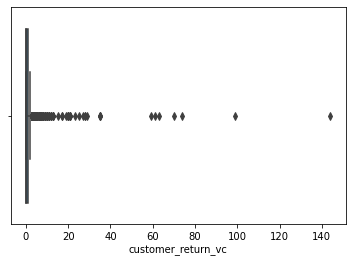

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


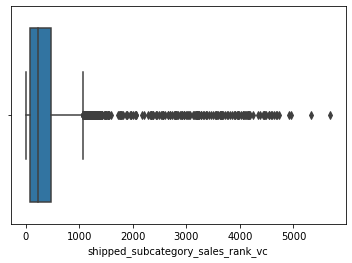

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


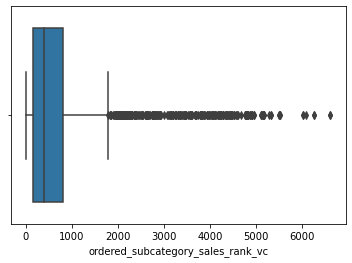

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


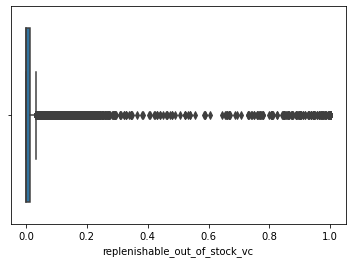

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


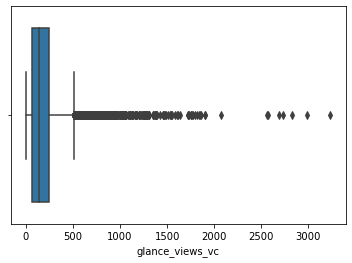

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


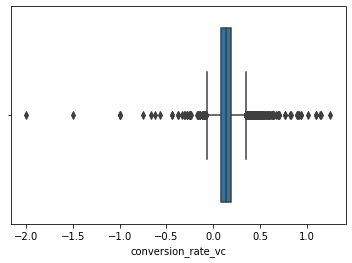

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


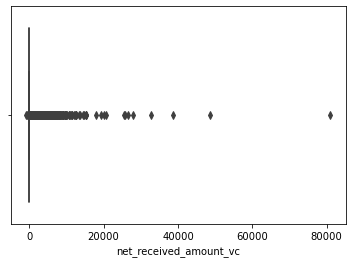

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


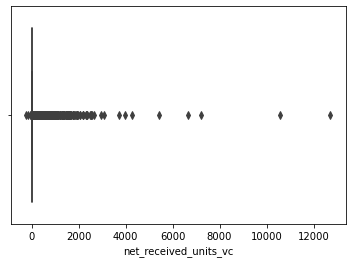

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


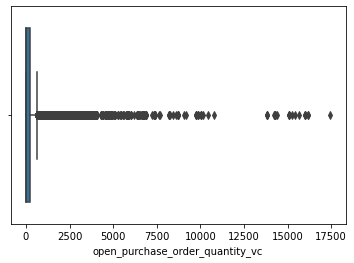

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


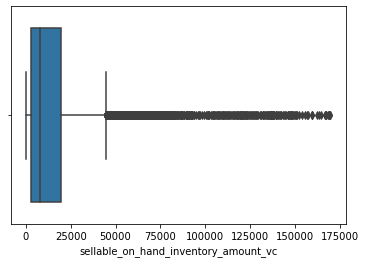

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


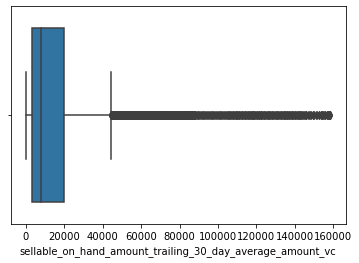

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


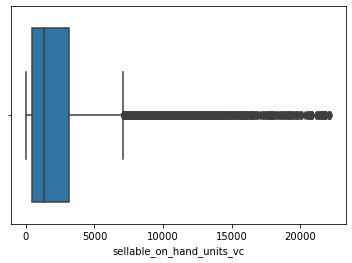

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


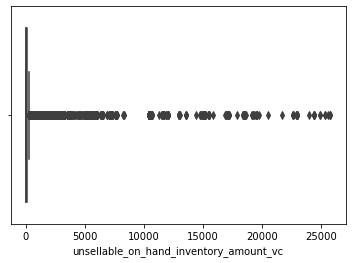

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


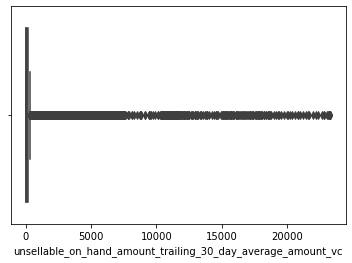

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


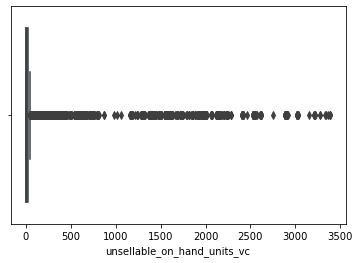

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


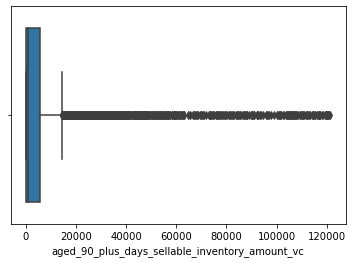

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


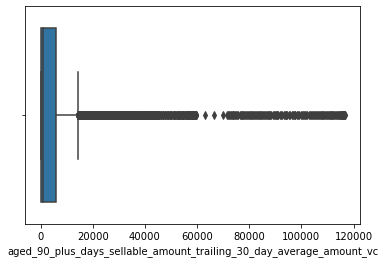

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


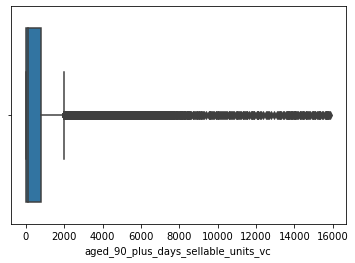

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


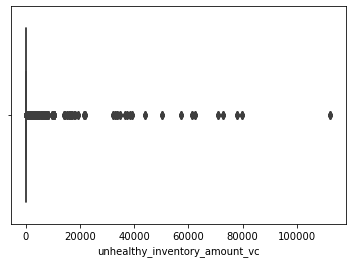

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


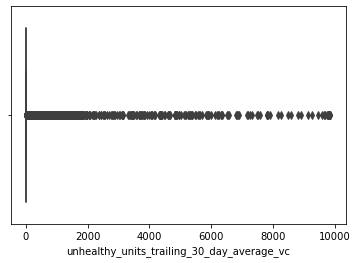

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


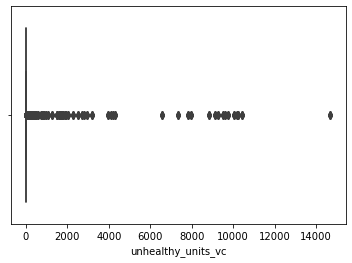

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


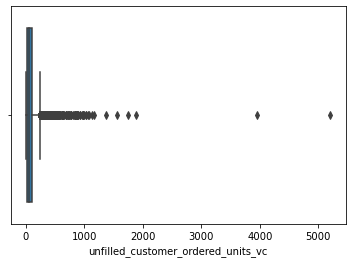

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


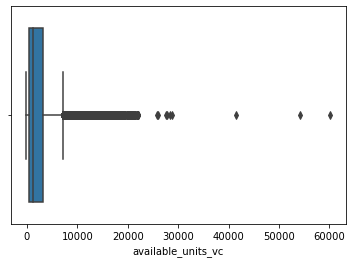

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


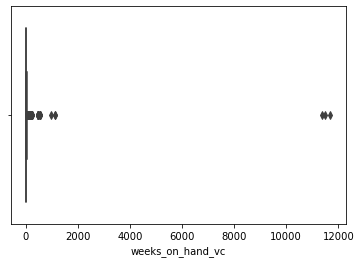

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


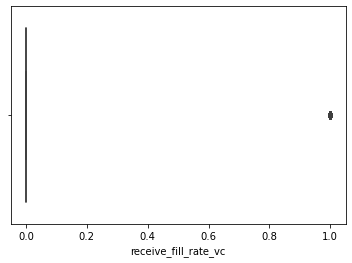

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


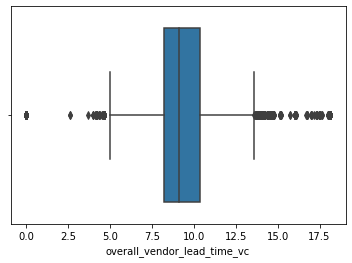

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


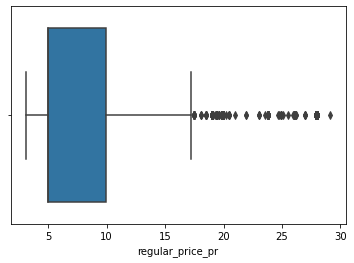

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


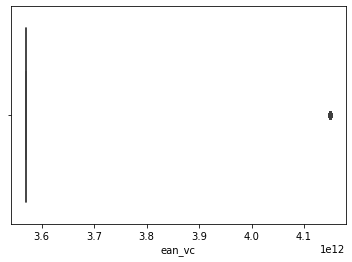

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


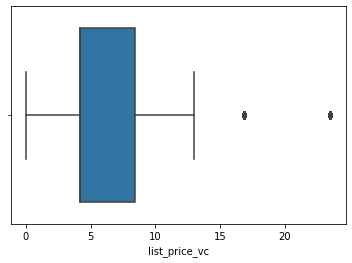

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


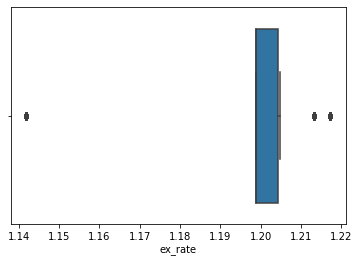

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


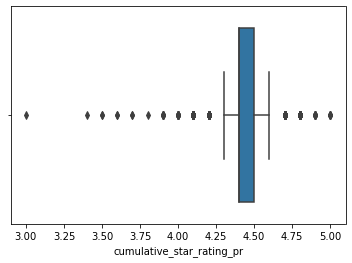

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


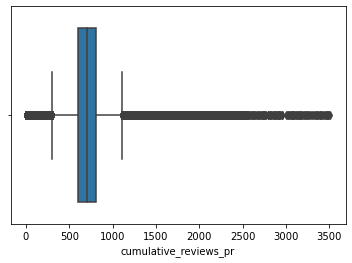

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


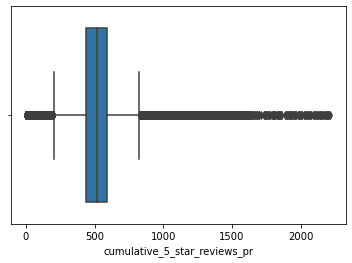

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


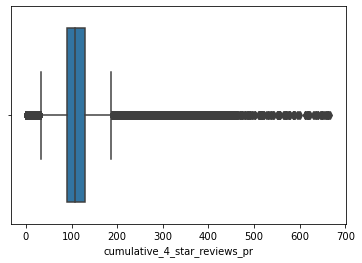

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


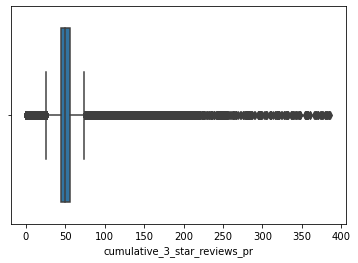

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


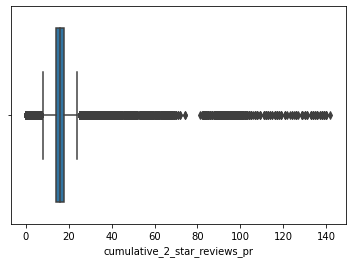

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


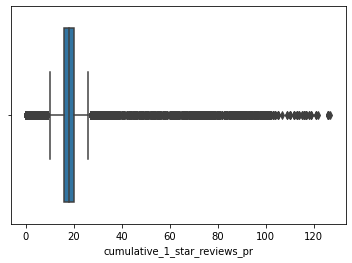

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


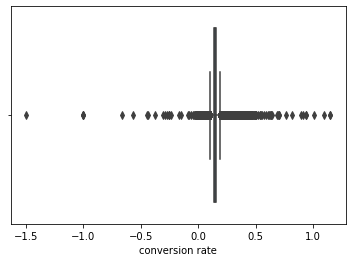

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


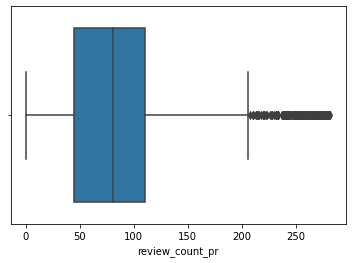

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


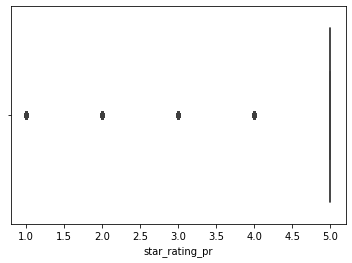

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


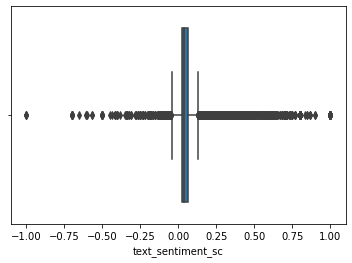

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


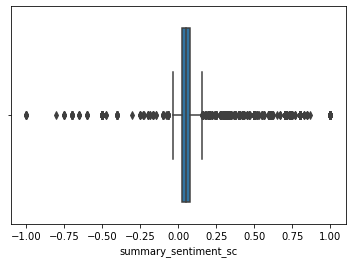

In [211]:
#Checking for ouliers before treatment
for i in df_numerical[1:]:
    sns.boxplot(df_numerical[i])
    plt.pause(.05)

In [261]:
df_numerical=df_numerical.apply(lambda x: outlier_capping(x))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


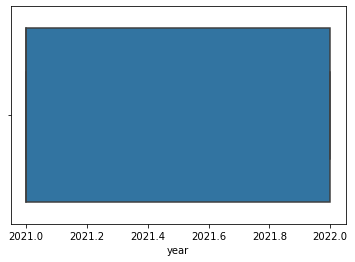

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


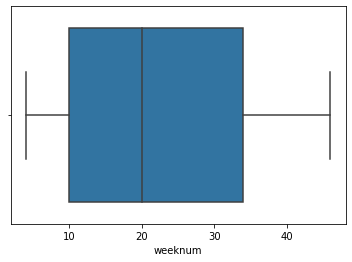

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


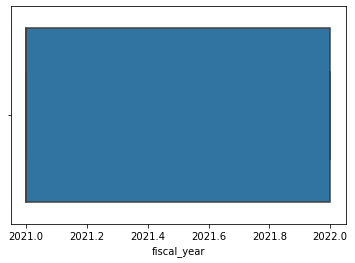

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


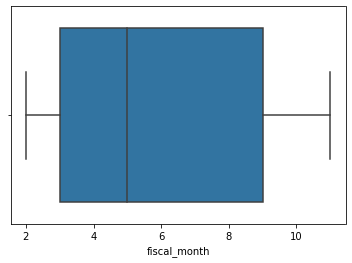

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


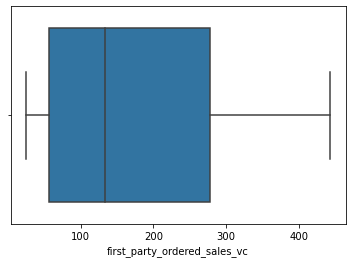

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


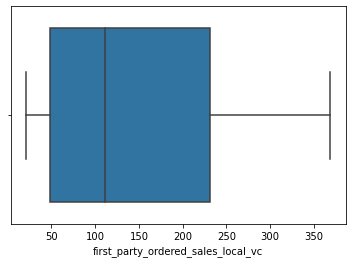

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


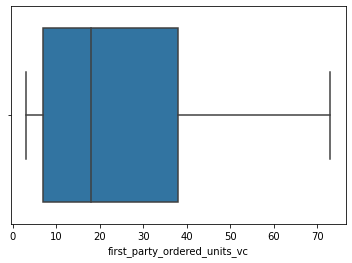

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


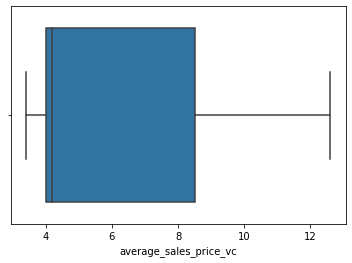

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


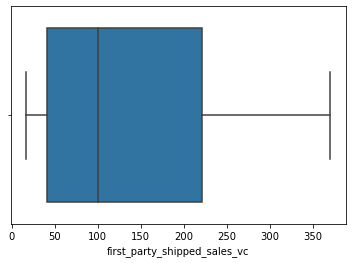

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


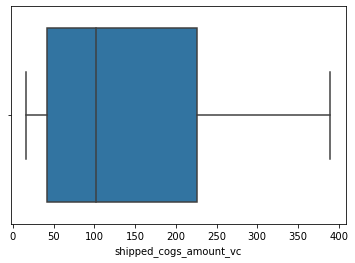

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


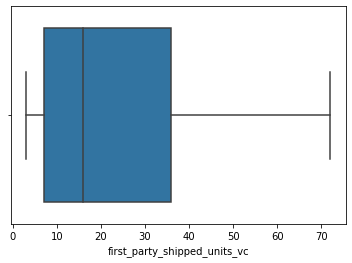

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


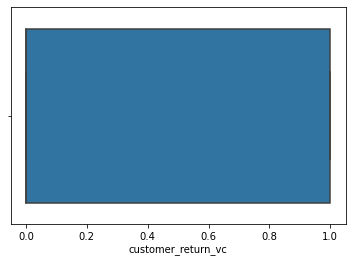

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


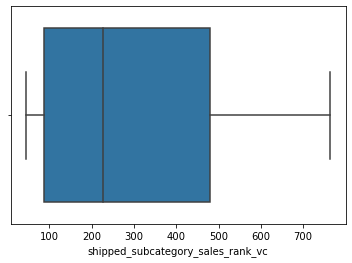

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


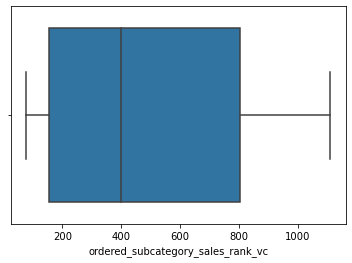

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


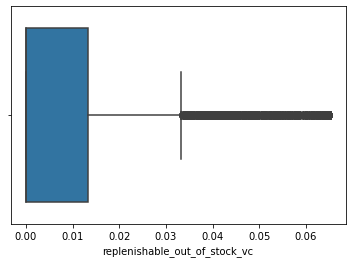

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


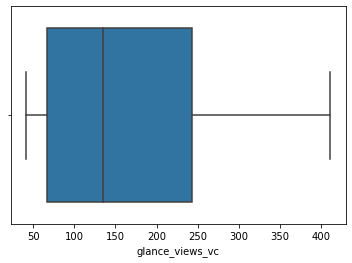

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


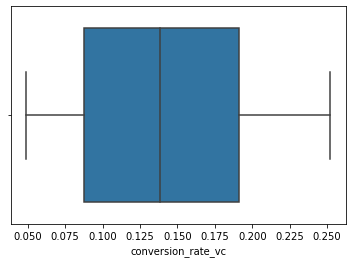

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


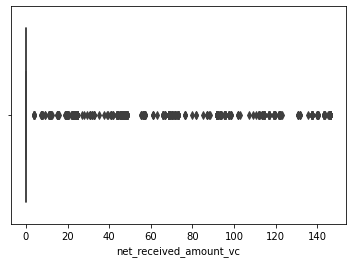

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


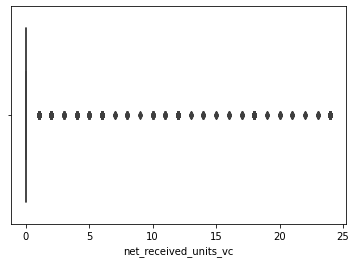

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


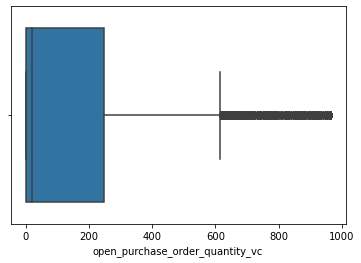

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


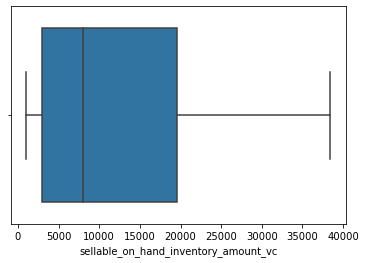

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


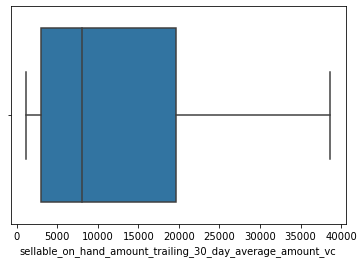

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


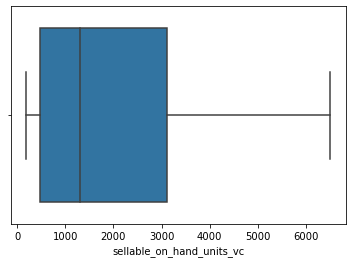

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


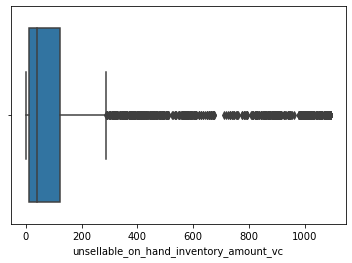

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


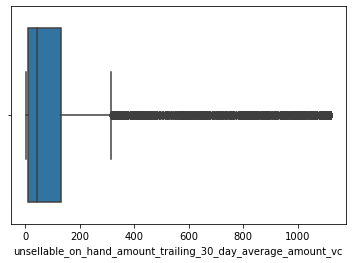

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


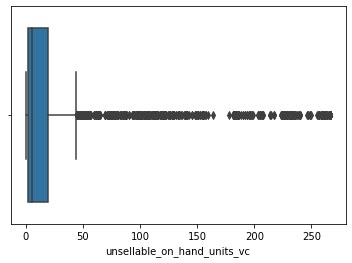

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


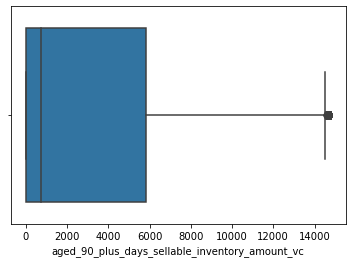

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


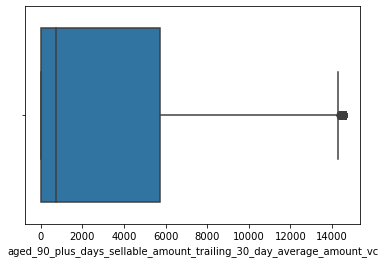

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


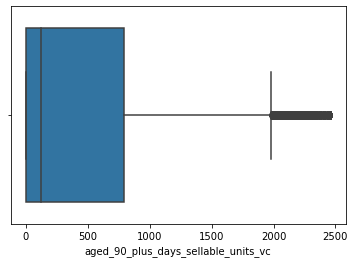

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


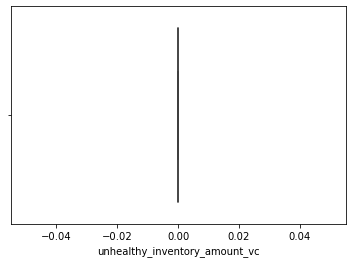

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


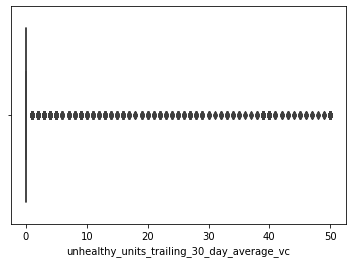

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


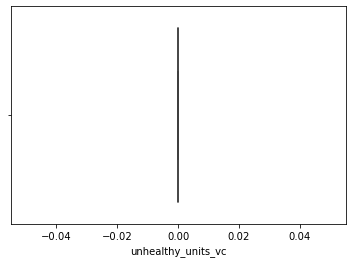

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


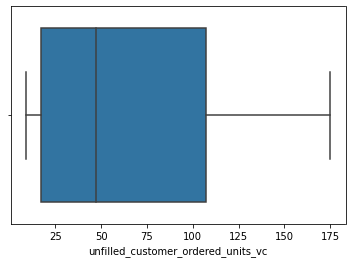

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


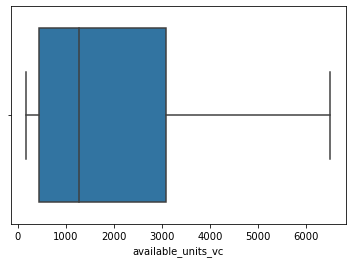

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


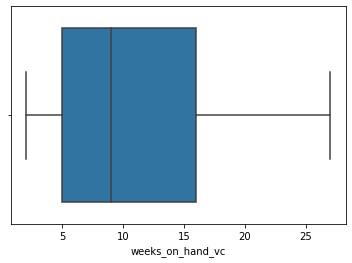

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


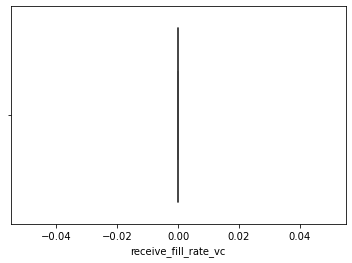

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


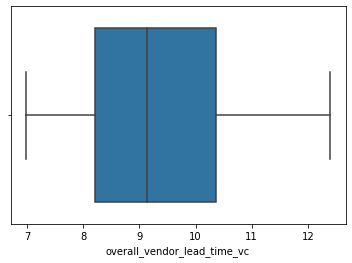

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


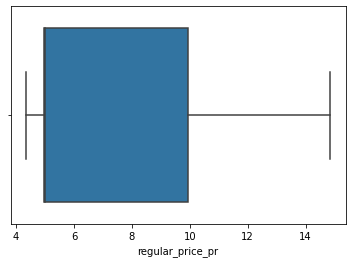

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


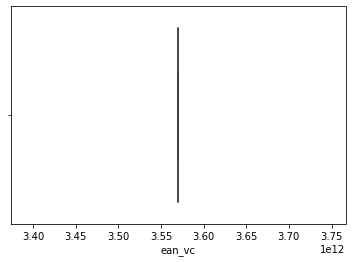

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


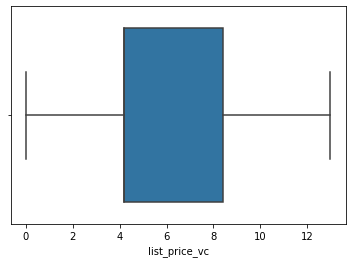

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


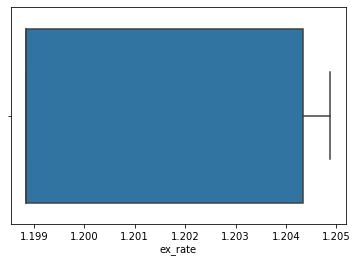

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


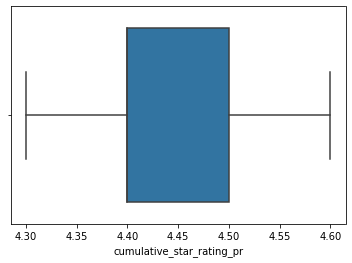

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


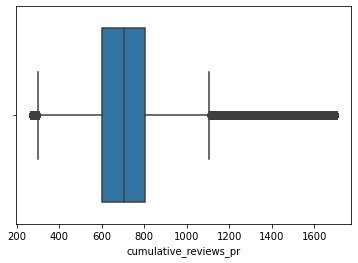

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


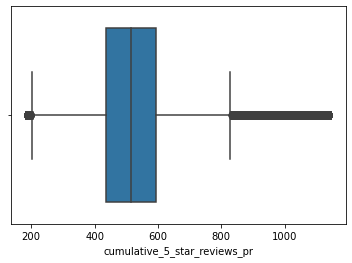

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


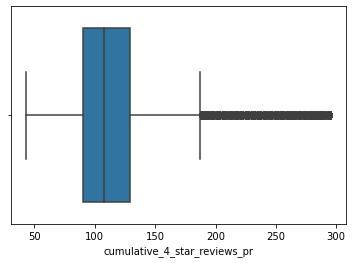

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


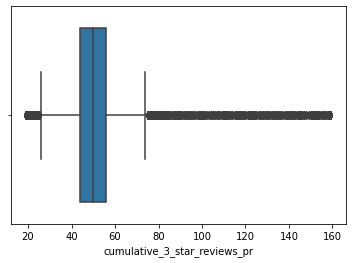

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


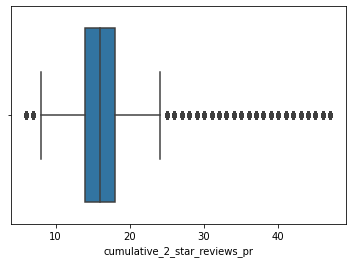

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


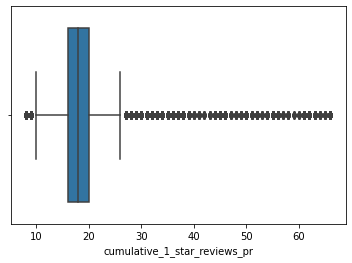

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


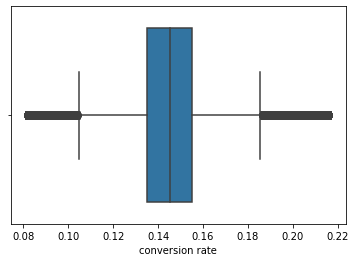

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


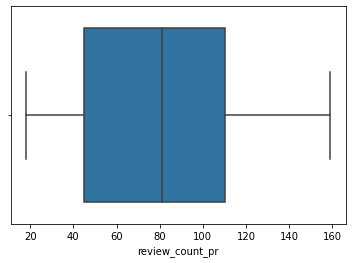

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


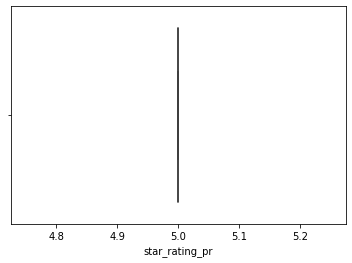

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


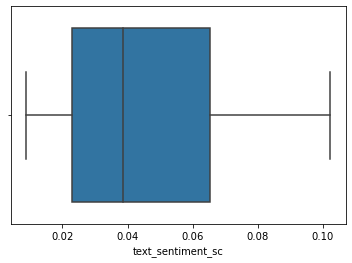

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


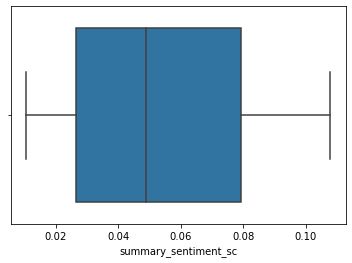

In [213]:
#Checking for ouliers after treatment   all except first_party_ordered_sales_vc,first_party_ordered_sales_local_va
# first_party_shipped_sales_vc, customer_return_vc,shipped_subcategory_sales_rank_vc,ordered_subcategory_sales_rank
# conversion_rate_vc,unfilled_customer_ordered_units_vc,ean_vc,cumulative_star_rating_pr
for i in df_numerical[1:]:
    sns.boxplot(df_numerical[i])
    plt.pause(.05)

## Filling missing values in categorical features with mode

In [262]:
df_categorical=df_categorical.apply(lambda x: x.fillna(x.mode().iloc[0]))

In [263]:
df_categorical.isnull().sum()

date                                                                          0
asin                                                                          0
gsr_level_2                                                                   0
isavc_vc                                                                      0
isprofitero_pr                                                                0
first_party_ordered_sales_currency_code_vc                                    0
first_party_ordered_sales_local_currency_code_vc                              0
first_party_shipped_sales_currency_code_vc                                    0
shipped_cogs_currency_code_vc                                                 0
preordered_revenue_currency_code_vc                                           0
net_received_amount_currency_code_vc                                          0
sellable_on_hand_inventory_currency_code_vc                                   0
sellable_on_hand_amount_trailing_30_day_

Dropping Categorical Features which are irrelevant since they dont have more than 1 category

In [264]:
df_categorical.drop(['first_party_ordered_sales_currency_code_vc',
                   'first_party_ordered_sales_local_currency_code_vc',
                    'first_party_shipped_sales_currency_code_vc',
                    'shipped_cogs_currency_code_vc','preordered_revenue_currency_code_vc',
                     'net_received_amount_currency_code_vc',
                     'sellable_on_hand_inventory_currency_code_vc',
                     'sellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
                    'unsellable_on_hand_inventory_currency_code_vc',
                    'unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
                    'aged_90_plus_days_sellable_inventory_currency_code_vc',
                    'aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc',
                    'unhealthy_inventory_currency_code_vc','selling_program_name_vc',
                     'isbn_13_vc','binding_vc','local_currency',
                      'target_currency','match_type_pr','type_pr','isavc_vc',
                     'isprofitero_pr','sitb_vc','parent_asin_vc','prime_pantry_pr',
                    'critical_pr','model_style_number_vc'],axis=1,inplace=True)

In [265]:
df_categorical.shape

(14356, 30)

## Checking Categorical Features and Imputing with Frequencies

Variables that have to cleaned: prep_instructions_vendor_state_vc, prep_instructions_required_vc and
 colour_vc

In [70]:
df_categorical.colour_vc.value_counts()

UNKNOWN    13453
Blau         520
blau         307
white         76
Name: colour_vc, dtype: int64

In [71]:
df_categorical.prep_instructions_required_vc.value_counts()

-                        13257
Bagging, Set creation      551
Set creation, Bagging      548
Name: prep_instructions_required_vc, dtype: int64

In [72]:
df_categorical.prep_instructions_vendor_state_vc.value_counts()

Amazon            13139
Vendor              551
-                   359
CPEX Certified      307
Name: prep_instructions_vendor_state_vc, dtype: int64

In [73]:
df_categorical.prep_instructions_vendor_state_vc.value_counts()

Amazon            13139
Vendor              551
-                   359
CPEX Certified      307
Name: prep_instructions_vendor_state_vc, dtype: int64

In [74]:
df_categorical['clothing_size_vc'].value_counts()

50         2398
50         1666
150        1640
200        1329
150        1061
200         875
15          666
15          582
25          333
30          333
400         333
3           332
75          332
1           332
125         324
75          219
2           219
25          218
30          218
400         218
1           188
125         188
3           188
2            88
UNKNOWN      76
Name: clothing_size_vc, dtype: int64

# Cleaning Categorical Variables (imputing categories with frequency)

In [75]:
df_categorical['clothing_size_vc'].replace({50:2398, 50:1666, 150:1640, 200:1329, 150:1061, 
200:875, 15:666, 15:582,25:333, 30:333,400:333,3:332,75:332,1:332,125:324,75:219,2:219, 
25:218, 30:218, 400:218,1:188 ,125:188,3:188,2:88, 'UNKNOWN':76},inplace=True)

In [76]:
df_categorical['gsr_level_2'].replace({'Acne Treatments':5403,'Cleansers':4701,'Moisturisers':4252},inplace=True)
df_categorical['availability_pr'].replace({'Y':13957,'N':327,'D':72},inplace=True)

df_categorical['third_party_seller_pr'].replace({'amazon':14110,'amazon.de':192,'-':22,
'scinfinita e-handel':7,'zeitburg schmuck & uhren':6,'apo-discounter online apotheke':4,
'my perfect brands':4,'apotheke online':3,'horn medical producing and trading':3,
'deutscheseck':2,'medpex':1,'sediva deutschland':1,'pb recommerce gmbh':1},inplace=True)

df_categorical['clothing_size_vc'].replace({50:2398, 50:1666, 150:1640, 200:1329, 150:1061, 
200:875, 15:666, 15:582,25:333, 30:333,400:333,3:332,75:332,1:332,125:324,75:219,2:219, 
25:218, 30:218, 400:218,1:188 ,125:188,3:188,2:88, 'UNKNOWN':76},inplace=True)

df_categorical['product_group_vc'].replace({'Beauty':14073,'Fresh_Ambient':283},inplace=True)
df_categorical['replenishment_code_vc'].replace({'PR':13824,'OS':307,'-':149,'NP':76},inplace=True)
df_categorical['colour_vc'].replace({'UNKNOWN':1,'Blau':2, 'blau':2, 'white':3},inplace=True)
df_categorical['prep_instructions_required_vc'].replace({'-':13257,'Bagging, Set creation':557,'Set creation, Bagging':548},inplace=True)

df_categorical['sponsored_pr'].replace({True:1,False:0},inplace=True)
df_categorical['third_party_only_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_choice_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_bestseller_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_subscribe_and_save_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_prime_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_addon_item_pr'].replace({True:1,False:0},inplace=True)
df_categorical['condition_pr'].replace({'Y':1,'N':0},inplace=True)
df_categorical['amazon_choice_pr'].replace({True:1,False:0},inplace=True)
df_categorical['customer_product_pr'].replace({True:1,False:0},inplace=True)
df_categorical['isinventory_vc'].replace({True:1,False:0},inplace=True)


In [77]:
df_categorical['prep_instructions_vendor_state_vc'].replace({'Amazon':13139,'Vendor':551,'-':359,'CPEX Certified':307},inplace=True)

In [78]:
df_categorical.head()

date        asin  gsr_level_2  availability_pr  \
0  20-12-2020  B000W6PY1W         5403            13957   
1  20-12-2020  B071936B11         4701            13957   
2  20-12-2020  B075KJBF9H         4252            13957   
3  20-12-2020  B07BVW522M         4252            13957   
4  20-12-2020  B07JMXSSYN         4701            13957   

   third_party_seller_pr clothing_size_vc  product_group_vc  \
0                  14110             1666             14073   
1                  14110              218             14073   
2                  14110              582             14073   
3                  14110              218             14073   
4                  14110              218             14073   

   replenishment_code_vc  colour_vc  prep_instructions_required_vc  \
0                  13824          1                          13257   
1                  13824          1                          13257   
2                  13824          1                            548   
3                  13824          1                          13257   
4                  13824          1                            557   

   prep_instructions_vendor_state_vc  sponsored_pr  third_party_only_pr  \
0                              13139             0                    1   
1                                551             0                    1   
2                              13139             0                    1   
3                              13139             0                    1   
4                              13139             0                    1   

   amazon_choice_pr  amazon_bestseller_pr  amazon_subscribe_and_save_pr  \
0                 0                     0                             0   
1                 0                     0                             0   
2                 0                     0                             0   
3                 0                     0                             0   
4                 0                     0                             0   

   amazon_prime_pr  amazon_addon_item_pr  condition_pr  customer_product_pr  \
0                0                     0             1                    0   
1                0                     0             1                    1   
2                0                     0             1                    1   
3                0                     0             1                    1   
4                0                     0             1                    1   

   free_replacements_vc  first_party_won_buy_box_pr  colour_count_vc  \
0                     0                         1.0              0.0   
1                     0                         1.0              1.0   
2                     0                         1.0              1.0   
3                     0                         1.0              1.0   
4                     0                         1.0              0.0   

   number_of_images_pr  isinventory_vc  useful_ratings_negative  \
0                  7.0               1                        0   
1                  7.0               1                        0   
2                  7.0               1                        2   
3                  7.0               1                        0   
4                  7.0               1                        0   

   useful_ratings_positive  feature_wise_rating  qna_answered  \
0                        4                    1             7   
1                        3                    1             9   
2                        0                    1             0   
3                        4                    1             6   
4                        4                    1             0   

   item_to_consider  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [218]:
df_categorical.drop(['asin','date'],axis=1,inplace=True)

# Defining Final Dataset after Missing value and Outlier Treatment

In [266]:
data_new = pd.concat([df_numerical, df_categorical], axis=1)

In [267]:
data_new.shape

(14356, 83)

In [268]:
data_new.drop([#'year','weeknum',
               'fiscal_year','fiscal_month',
               'clothing_size_vc'],axis=1,inplace=True)

In [269]:
data_new.drop('conversion rate',axis=1,inplace=True)

In [270]:
data_new.shape

(14356, 79)

In [85]:
data_new.head()

first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
0                         240.7                              210.85   
1                         197.6                              173.04   
2                         326.9                              286.26   
3                         227.5                              199.25   
4                          25.1                               20.80   

   first_party_ordered_units_vc  average_sales_price_vc  \
0                          59.0                     3.6   
1                          14.0                    12.4   
2                          18.0                    12.6   
3                          25.0                     8.0   
4                           3.0                    12.6   

   first_party_shipped_sales_vc  shipped_cogs_amount_vc  \
0                         33.95                   47.67   
1                        119.85                  107.40   
2                         59.05                   59.44   
3                        127.91                  145.28   
4                         38.73                   34.07   

   first_party_shipped_units_vc  customer_return_vc  \
0                           9.0                 0.0   
1                          10.0                 0.0   
2                           4.0                 0.0   
3                          16.0                 0.0   
4                           3.0                 0.0   

   shipped_subcategory_sales_rank_vc  ordered_subcategory_sales_rank_vc  \
0                              550.0                              172.0   
1                              165.0                              289.0   
2                              343.0                             1111.0   
3                              151.0                              209.0   
4                              505.0                             1111.0   

   replenishable_out_of_stock_vc  glance_views_vc  conversion_rate_vc  \
0                         0.0000            362.0              0.1630   
1                         0.0000             83.0              0.1687   
2                         0.0000            114.0              0.1579   
3                         0.0144            341.0              0.0733   
4                         0.0000             41.0              0.0526   

   net_received_amount_vc  net_received_units_vc  \
0                     0.0                    0.0   
1                     0.0                    0.0   
2                     0.0                    0.0   
3                     0.0                    0.0   
4                     0.0                    0.0   

   open_purchase_order_quantity_vc  sellable_on_hand_inventory_amount_vc  \
0                              0.0                               970.535   
1                              0.0                               970.535   
2                              0.0                               970.535   
3                              0.0                               970.535   
4                              0.0                               970.535   

   sellable_on_hand_amount_trailing_30_day_average_amount_vc  \
0                                           1138.515           
1                                           1138.515           
2                                           1138.515           
3                                           1138.515           
4                                           1138.515           

   sellable_on_hand_units_vc  unsellable_on_hand_inventory_amount_vc  \
0                      178.0                                     0.0   
1                      178.0                                     0.0   
2                      178.0                                     0.0   
3                      178.0                                     0.0   
4                      178.0                                     0.0   

   unsellable_on_hand_amount_trailing_30_day_average_amou

# Variable Reduction & Model Building

In [86]:
from pandas import Series, DataFrame
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor,RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [87]:
data_new.columns

Index(['first_party_ordered_sales_vc', 'first_party_ordered_sales_local_vc',
       'first_party_ordered_units_vc', 'average_sales_price_vc',
       'first_party_shipped_sales_vc', 'shipped_cogs_amount_vc',
       'first_party_shipped_units_vc', 'customer_return_vc',
       'shipped_subcategory_sales_rank_vc',
       'ordered_subcategory_sales_rank_vc', 'replenishable_out_of_stock_vc',
       'glance_views_vc', 'conversion_rate_vc', 'net_received_amount_vc',
       'net_received_units_vc', 'open_purchase_order_quantity_vc',
       'sellable_on_hand_inventory_amount_vc',
       'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'sellable_on_hand_units_vc', 'unsellable_on_hand_inventory_amount_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'unsellable_on_hand_units_vc',
       'aged_90_plus_days_sellable_inventory_amount_vc',
       'aged_90_plus_days_sellable_amount_trailing_30_day_average_amount_vc',
       'aged_90_plus_days_sellable

## Approach 1: RFE and VIF

In [88]:
y=data_new['conversion_rate_vc']
X=data_new.drop('conversion_rate_vc',axis=1)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [90]:
X_train.columns

Index(['first_party_ordered_sales_vc', 'first_party_ordered_sales_local_vc',
       'first_party_ordered_units_vc', 'average_sales_price_vc',
       'first_party_shipped_sales_vc', 'shipped_cogs_amount_vc',
       'first_party_shipped_units_vc', 'customer_return_vc',
       'shipped_subcategory_sales_rank_vc',
       'ordered_subcategory_sales_rank_vc', 'replenishable_out_of_stock_vc',
       'glance_views_vc', 'net_received_amount_vc', 'net_received_units_vc',
       'open_purchase_order_quantity_vc',
       'sellable_on_hand_inventory_amount_vc',
       'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'sellable_on_hand_units_vc', 'unsellable_on_hand_inventory_amount_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'unsellable_on_hand_units_vc',
       'aged_90_plus_days_sellable_inventory_amount_vc',
       'aged_90_plus_days_sellable_amount_trailing_30_day_average_amount_vc',
       'aged_90_plus_days_sellable_units_vc', 'unhealthy

In [91]:
rfe = RFE(estimator=RandomForestRegressor(),
          n_features_to_select=30, step=10)

In [92]:
model= rfe.fit(X_train, y_train)

In [93]:
print(X_train.columns[rfe.support_])

Index(['first_party_ordered_sales_vc', 'first_party_ordered_sales_local_vc',
       'first_party_ordered_units_vc', 'average_sales_price_vc',
       'first_party_shipped_sales_vc', 'shipped_subcategory_sales_rank_vc',
       'ordered_subcategory_sales_rank_vc', 'replenishable_out_of_stock_vc',
       'glance_views_vc', 'open_purchase_order_quantity_vc',
       'sellable_on_hand_inventory_amount_vc',
       'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'sellable_on_hand_units_vc', 'unsellable_on_hand_inventory_amount_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'aged_90_plus_days_sellable_inventory_amount_vc',
       'aged_90_plus_days_sellable_amount_trailing_30_day_average_amount_vc',
       'aged_90_plus_days_sellable_units_vc',
       'unfilled_customer_ordered_units_vc', 'available_units_vc',
       'weeks_on_hand_vc', 'overall_vendor_lead_time_vc', 'list_price_vc',
       'ex_rate', 'cumulative_5_star_reviews_pr', 'review_

In [114]:
rfe_data=data_new[['first_party_ordered_sales_vc', 'first_party_ordered_sales_local_vc',
       'first_party_ordered_units_vc', 'average_sales_price_vc',
       'first_party_shipped_sales_vc', 'shipped_cogs_amount_vc',
       'shipped_subcategory_sales_rank_vc',
       'ordered_subcategory_sales_rank_vc', 'replenishable_out_of_stock_vc',
       'glance_views_vc', 'open_purchase_order_quantity_vc',
       'sellable_on_hand_inventory_amount_vc',
       'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'sellable_on_hand_units_vc', 'unsellable_on_hand_inventory_amount_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'aged_90_plus_days_sellable_inventory_amount_vc',
       'aged_90_plus_days_sellable_amount_trailing_30_day_average_amount_vc',
       'aged_90_plus_days_sellable_units_vc',
       'unfilled_customer_ordered_units_vc', 'available_units_vc',
       'weeks_on_hand_vc', 'overall_vendor_lead_time_vc', 'list_price_vc',
       'ex_rate', 'cumulative_5_star_reviews_pr', 'review_count_pr',
       'gsr_level_2', 'number_of_images_pr', 'useful_ratings_positive','qna_answered',
                  'conversion_rate_vc']]

In [115]:
rfe_features=rfe_data.drop('conversion_rate_vc',axis=1)

### VIF on RFE Features

Taking VIF Threshold Value of <20

In [71]:
X_new = rfe_features
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [72]:
vif.sort_values(by='VIF_Factor',ascending=False)

VIF_Factor                                           features
1   23741.802395                 first_party_ordered_sales_local_vc
0   23718.705950                       first_party_ordered_sales_vc
24    479.971272                                            ex_rate
27    337.174223                                        gsr_level_2
4     117.753870                       first_party_shipped_sales_vc
5     112.225881                             shipped_cogs_amount_vc
13     92.036450                          sellable_on_hand_units_vc
28     77.247999                                number_of_images_pr
20     73.282814                                 available_units_vc
11     56.946602               sellable_on_hand_inventory_amount_vc
22     46.473856                        overall_vendor_lead_time_vc
12     42.736461  sellable_on_hand_amount_trailing_30_day_averag...
2      36.597463                       first_party_ordered_units_vc
16     33.302067     aged_90_plus_days_sellable_inventory_amount_vc
3      23.371132                             average_sales_price_vc
17     18.542608  aged_90_plus_days_sellable_amount_trailing_30_...
9      18.499196                                    glance_views_vc
18     17.888101                aged_90_plus_days_sellable_units_vc
19     14.453091                 unfilled_customer_ordered_units_vc
25     11.816749                       cumulative_5_star_reviews_pr
26     11.692654                                    review_count_pr
15      9.278138  unsellable_on_hand_amount_trailing_30_day_aver...
14      8.971838             unsellable_on_hand_inventory_amount_vc
6       8.810202                  shipped_subcategory_sales_rank_vc
21      8.785709                                   weeks_on_hand_vc
7       8.118854                  ordered_subcategory_sales_rank_vc
23      7.643116                                      list_price_vc
29      5.543169                            useful_ratings_positive
10      2.100713                    open_purchase_order_quantity_vc
8       1.562150                      replenishable_out_of_stock_vc

In [100]:
rfe_features=data_new[['first_party_ordered_sales_vc', #'first_party_ordered_sales_local_vc',
       #'first_party_ordered_units_vc', 
        'average_sales_price_vc',
      # 'first_party_shipped_sales_vc',
       'shipped_cogs_amount_vc',
       'shipped_subcategory_sales_rank_vc',
       'ordered_subcategory_sales_rank_vc', 'replenishable_out_of_stock_vc',
       'glance_views_vc', 'open_purchase_order_quantity_vc',
       #'sellable_on_hand_inventory_amount_vc',
       'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
      # 'sellable_on_hand_units_vc',
       'unsellable_on_hand_inventory_amount_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
      # 'aged_90_plus_days_sellable_inventory_amount_vc',
       'aged_90_plus_days_sellable_amount_trailing_30_day_average_amount_vc',
       'aged_90_plus_days_sellable_units_vc',
       'unfilled_customer_ordered_units_vc', 'available_units_vc',
       'weeks_on_hand_vc', 
       #'overall_vendor_lead_time_vc', 
        'list_price_vc',
       #'ex_rate', 
       'cumulative_5_star_reviews_pr', 'review_count_pr',
      # 'gsr_level_2', 
       #'number_of_images_pr',
       'useful_ratings_positive']]

In [101]:
X_new = rfe_features
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [102]:
vif.sort_values(by='VIF_Factor',ascending=False)

VIF_Factor                                           features
0    15.701722                       first_party_ordered_sales_vc
8    15.623015  sellable_on_hand_amount_trailing_30_day_averag...
14   14.636062                                 available_units_vc
6    14.135616                                    glance_views_vc
13   11.143809                 unfilled_customer_ordered_units_vc
18   11.085469                                    review_count_pr
12   10.538299                aged_90_plus_days_sellable_units_vc
17   10.259604                       cumulative_5_star_reviews_pr
11    9.909306  aged_90_plus_days_sellable_amount_trailing_30_...
10    9.191766  unsellable_on_hand_amount_trailing_30_day_aver...
9     8.912146             unsellable_on_hand_inventory_amount_vc
2     8.898754                             shipped_cogs_amount_vc
1     8.267157                             average_sales_price_vc
15    7.975144                                   weeks_on_hand_vc
3     6.971535                  shipped_subcategory_sales_rank_vc
4     6.554657                  ordered_subcategory_sales_rank_vc
16    5.620901                                      list_price_vc
19    4.884521                            useful_ratings_positive
7     1.989448                    open_purchase_order_quantity_vc
5     1.488639                      replenishable_out_of_stock_vc

In [103]:
rfe_data=data_new[['first_party_ordered_sales_vc',
        'average_sales_price_vc',
       'shipped_cogs_amount_vc',
       'shipped_subcategory_sales_rank_vc',
       'ordered_subcategory_sales_rank_vc', 'replenishable_out_of_stock_vc',
       'glance_views_vc', 'open_purchase_order_quantity_vc',
       'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'unsellable_on_hand_inventory_amount_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'aged_90_plus_days_sellable_amount_trailing_30_day_average_amount_vc',
       'aged_90_plus_days_sellable_units_vc',
       'unfilled_customer_ordered_units_vc', 'available_units_vc',
       'weeks_on_hand_vc', 
        'list_price_vc',
       'cumulative_5_star_reviews_pr', 'review_count_pr',
       'useful_ratings_positive','conversion_rate_vc']]

In [104]:
rfe_data.shape

(14356, 21)

### Models on RFE Data

In [130]:
X = rfe_data.drop('conversion_rate_vc',axis=1).values
y = rfe_data['conversion_rate_vc'].values

In [131]:
X.shape

(14356, 31)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [133]:
y_train

array([0.0488, 0.2521, 0.1304, ..., 0.16  , 0.2521, 0.1763])

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [135]:
regrr = [LinearRegression(),AdaBoostRegressor(),RandomForestRegressor(),DecisionTreeRegressor(max_depth=6),GradientBoostingRegressor(n_estimators=100),
         XGBRegressor(n_estimators=100),LGBMRegressor(n_estimators=100)]

In [122]:
%%time
tr= []
te =[]
rmse=[]
for mod in regrr:
    model = mod
    model.fit(X_train,y_train)
    y_pred_tst=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    pred_tr = model.predict(X_train)
    pred_te = model.predict(X_test)
    tr.append(r2_score(y_train,y_pred_train))
    te.append(r2_score(y_test,y_pred_tst))
    rmse.append(mean_squared_error(y_train, y_pred_train))

Wall time: 17.7 s


In [123]:
model_nm = 'LinearReg AdaBoost DT RF GBM XGB LGB'.split()
result = pd.DataFrame({'model':model_nm,'train_score':tr,'test_score':te,'RMSE':rmse})

In [124]:
result

model  train_score  test_score      RMSE
0  LinearReg     0.717422    0.703244  0.001182
1   AdaBoost     0.674282    0.661298  0.001362
2         DT     0.991619    0.944112  0.000035
3         RF     0.814662    0.791165  0.000775
4        GBM     0.941826    0.928846  0.000243
5        XGB     0.991979    0.945110  0.000034
6        LGB     0.975043    0.950099  0.000104

In [136]:
linreg=LinearRegression()

In [137]:
linreg.fit(X_train,y_train)

LinearRegression()

In [138]:
coefficients = pd.concat([pd.DataFrame(rfe_features.columns),pd.DataFrame(np.transpose(linreg.coef_))], axis = 1)

In [139]:
coefficients.rename(columns={0:'Features',0:'coefficients'}).head(30)

coefficients  coefficients
0                        first_party_ordered_sales_vc -6.555060e-05
1                  first_party_ordered_sales_local_vc  3.880391e-04
2                        first_party_ordered_units_vc  3.155316e-03
3                              average_sales_price_vc -3.827814e-03
4                        first_party_shipped_sales_vc -4.650681e-05
5                              shipped_cogs_amount_vc  3.336732e-05
6                   shipped_subcategory_sales_rank_vc  3.383744e-06
7                   ordered_subcategory_sales_rank_vc -2.240312e-05
8                       replenishable_out_of_stock_vc -3.114492e-03
9                                     glance_views_vc -6.917269e-04
10                    open_purchase_order_quantity_vc  2.710890e-06
11               sellable_on_hand_inventory_amount_vc -8.015585e-08
12  sellable_on_hand_amount_trailing_30_day_averag... -1.956988e-07
13                          sellable_on_hand_units_vc  2.658433e-06
14             unsellable_on_hand_inventory_amount_vc -1.574898e-06
15  unsellable_on_hand_amount_trailing_30_day_aver...  4.404948e-06
16     aged_90_plus_days_sellable_inventory_amount_vc -7.858563e-08
17  aged_90_plus_days_sellable_amount_trailing_30_...  1.359320e-07
18                aged_90_plus_days_sellable_units_vc  4.263835e-06
19                 unfilled_customer_ordered_units_vc -3.023688e-05
20                                 available_units_vc  3.436788e-07
21                                   weeks_on_hand_vc -4.754063e-05
22                        overall_vendor_lead_time_vc -5.253751e-04
23                                      list_price_vc -1.287726e-04
24                                            ex_rate -3.731404e-01
25                       cumulative_5_star_reviews_pr -2.031062e-06
26                                    review_count_pr -1.558222e-04
27                                        gsr_level_2  9.945039e-06
28                                number_of_images_pr -1.807550e-03
29                            useful_ratings_positive -3.286777e-03

# LR Model with Business Critical Features

In [166]:
df=data_new[['availability_pr',
'average_sales_price_vc',
'cumulative_1_star_reviews_pr',
'cumulative_2_star_reviews_pr',
'cumulative_3_star_reviews_pr',
'cumulative_4_star_reviews_pr',
'cumulative_5_star_reviews_pr',
'cumulative_reviews_pr',
'feature_wise_rating',
'free_replacements_vc',
'item_to_consider',
'list_price_vc',
'number_of_images_pr',
'ordered_subcategory_sales_rank_vc',
#'promo_type_pr',
#'promotion_price_pr',
'replenishable_out_of_stock_vc',
'shipped_subcategory_sales_rank_vc',
'useful_ratings_negative',
'useful_ratings_positive','conversion_rate_vc']]

In [167]:
bus_features=df.drop('conversion_rate_vc',axis=1)

In [168]:
X = df.drop('conversion_rate_vc',axis=1).values
y = df['conversion_rate_vc'].values

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [170]:
linreg=LinearRegression()

In [171]:
linreg.fit(X_train,y_train)

LinearRegression()

In [172]:
regrr = [LinearRegression(),AdaBoostRegressor(),RandomForestRegressor(),DecisionTreeRegressor(max_depth=6),GradientBoostingRegressor(n_estimators=100),
         XGBRegressor(n_estimators=100),LGBMRegressor(n_estimators=100)]

In [173]:
%%time
tr= []
te =[]
rmse=[]
for mod in regrr:
    model = mod
    model.fit(X_train,y_train)
    y_pred_tst=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    pred_tr = model.predict(X_train)
    pred_te = model.predict(X_test)
    tr.append(r2_score(y_train,y_pred_train))
    te.append(r2_score(y_test,y_pred_tst))
    rmse.append(mean_squared_error(y_train, y_pred_train))

Wall time: 7.73 s


In [174]:
model_nm = 'LinearReg AdaBoost DT RF GBM XGB LGB'.split()
result = pd.DataFrame({'model':model_nm,'train_score':tr,'test_score':te,'RMSE':rmse})

In [175]:
result

model  train_score  test_score      RMSE
0  LinearReg     0.332247    0.343777  0.002795
1   AdaBoost     0.359803    0.358999  0.002680
2         DT     0.908031    0.537417  0.000385
3         RF     0.485091    0.474419  0.002155
4        GBM     0.545082    0.536108  0.001904
5        XGB     0.786321    0.531948  0.000894
6        LGB     0.652820    0.568146  0.001453

In [176]:
coefficients = pd.concat([pd.DataFrame(bus_features.columns),pd.DataFrame(np.transpose(linreg.coef_))], axis = 1)

In [177]:
coefficients.rename(columns={0:'Features',0:'coefficients'}).head(30)

coefficients  coefficients
0                     availability_pr      0.000006
1              average_sales_price_vc     -0.004684
2        cumulative_1_star_reviews_pr     -0.000608
3        cumulative_2_star_reviews_pr     -0.000023
4        cumulative_3_star_reviews_pr      0.000325
5        cumulative_4_star_reviews_pr     -0.000699
6        cumulative_5_star_reviews_pr     -0.000007
7               cumulative_reviews_pr      0.000125
8                 feature_wise_rating      0.013999
9                free_replacements_vc      0.001193
10                   item_to_consider      0.016549
11                      list_price_vc     -0.005040
12                number_of_images_pr     -0.002993
13  ordered_subcategory_sales_rank_vc     -0.000044
14      replenishable_out_of_stock_vc      0.289161
15  shipped_subcategory_sales_rank_vc     -0.000024
16            useful_ratings_negative     -0.006672
17            useful_ratings_positive      0.000025

## Approach 2:  Select K Best, OLS and VIF

1. Select K BEST

In [60]:
X = data_new[data_new.columns.difference(['conversion_rate_vc'])]
SKB = SelectKBest(f_regression, k=30).fit(X, data_new[['conversion_rate_vc']] )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -


In [61]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [62]:
imp_vars_SKB

['aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'average_sales_price_vc',
 'colour_vc',
 'cumulative_3_star_reviews_pr',
 'cumulative_5_star_reviews_pr',
 'cumulative_reviews_pr',
 'first_party_ordered_sales_local_vc',
 'first_party_ordered_sales_vc',
 'first_party_ordered_units_vc',
 'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'open_purchase_order_quantity_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'sellable_on_hand_inventory_amount_vc',
 'sellable_on_hand_units_vc',
 'shipped_cogs_amount_vc',
 'shipped_subcategory_sales_rank_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc']

In [63]:
final_data=data_new[['aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'average_sales_price_vc',
 'colour_vc',
 'cumulative_3_star_reviews_pr',
 'cumulative_5_star_reviews_pr',
 'cumulative_reviews_pr',
 'first_party_ordered_sales_local_vc',
 'first_party_ordered_sales_vc',
 'first_party_ordered_units_vc',
 'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'open_purchase_order_quantity_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'sellable_on_hand_inventory_amount_vc',
 'sellable_on_hand_units_vc',
 'shipped_cogs_amount_vc',
 'shipped_subcategory_sales_rank_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc','conversion_rate_vc']]

final_features=data_new[['aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'average_sales_price_vc',
 'colour_vc',
 'cumulative_3_star_reviews_pr',
 'cumulative_5_star_reviews_pr',
 'cumulative_reviews_pr',
 'first_party_ordered_sales_local_vc',
 'first_party_ordered_sales_vc',
 'first_party_ordered_units_vc',
 'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'open_purchase_order_quantity_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'sellable_on_hand_inventory_amount_vc',
 'sellable_on_hand_units_vc',
 'shipped_cogs_amount_vc',
 'shipped_subcategory_sales_rank_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc']]

2. Feature Reduction through OLS Regression

In [64]:
y=final_data.conversion_rate_vc
X=final_data.drop('conversion_rate_vc',axis=1)

In [65]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     conversion_rate_vc   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              7485.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                        0.00
Time:                        11:13:10   Log-Likelihood:                          25972.
No. Observations:               14356   AIC:                                 -5.188e+04
Df Residuals:                   14326   BIC:                                 -5.166e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                                                                  coef    std err          t      P>|t|      [0.025     

Dropping all variables from OLS Regression that are insiginificant with a P-value more than 0.05 These
are :

Cumulative 3 star reviews,
Cumulative 5 star reviews,
Cumulative reviews,
first party ordered local sales vc,
first party ordered sales vc,
open purchase order quantity,
shipped cogs amount,
shipped subcategory sales rank,
unsellable_on_hand_amount_trailing_30_day_average_amount_vc

Retaining all other 22 variables in the dataset for final model.

Setting all the above features from Select K Best and OLS Regression final_data.

In [98]:
# These features are the same coming from Select K Best and OLS Regression. So setting 
# final_data (in the cell below) as the final features

final_data=data_new[[
'aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'average_sales_price_vc',
 'colour_vc',
 'first_party_ordered_sales_vc',
 'first_party_ordered_units_vc',
 'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'sellable_on_hand_inventory_amount_vc',
 'sellable_on_hand_units_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc','conversion_rate_vc']]


x_vars=data_new[[
'aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'average_sales_price_vc',
 'colour_vc',
 'first_party_ordered_sales_vc',
 'first_party_ordered_units_vc',
 'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'sellable_on_hand_inventory_amount_vc',
 'sellable_on_hand_units_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc']]


3. Running VIF on 22 features

In [67]:
X_new = x_vars
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [68]:
vif.sort_values(by='VIF_Factor',ascending=False)

VIF_Factor                                           features
18   67.826479                          sellable_on_hand_units_vc
17   49.990013               sellable_on_hand_inventory_amount_vc
2    48.175500                                 available_units_vc
4    44.566065                                          colour_vc
6    43.213432                       first_party_ordered_units_vc
3    38.160084                             average_sales_price_vc
5    35.895645                       first_party_ordered_sales_vc
16   35.758779  sellable_on_hand_amount_trailing_30_day_averag...
8    34.196028                       first_party_shipped_units_vc
7    33.464904                       first_party_shipped_sales_vc
15   29.339424                                   regular_price_pr
13   23.973821                      prep_instructions_required_vc
9    16.282984                                    glance_views_vc
10   16.263185                                        gsr_level_2
20   15.859406             unsellable_on_hand_inventory_amount_vc
21   15.628855                        unsellable_on_hand_units_vc
19   11.653679                 unfilled_customer_ordered_units_vc
11    9.376312                                      list_price_vc
14    5.513451                                       qna_answered
12    5.213387                  ordered_subcategory_sales_rank_vc
0     2.440119                aged_90_plus_days_sellable_units_vc
1     1.331952                                    availability_pr

In [69]:
# Manually deleted all variables one by one which were having a threshold value of more than 20. 

x_vars=data_new[[
'aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 #'average_sales_price_vc',
 #'colour_vc',
 'first_party_ordered_sales_vc',
 #'first_party_ordered_units_vc',
 #'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 #'sellable_on_hand_inventory_amount_vc',
 #'sellable_on_hand_units_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc']]

In [70]:
X_new = x_vars
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [71]:
vif.sort_values(by='VIF_Factor',ascending=False)

VIF_Factor                                           features
14   15.767077             unsellable_on_hand_inventory_amount_vc
15   15.472070                        unsellable_on_hand_units_vc
5    13.568038                                    glance_views_vc
6    13.472169                                        gsr_level_2
9    12.258570                      prep_instructions_required_vc
12   11.984133  sellable_on_hand_amount_trailing_30_day_averag...
3    11.020263                       first_party_ordered_sales_vc
13   10.086718                 unfilled_customer_ordered_units_vc
2     9.702146                                 available_units_vc
7     7.522929                                      list_price_vc
4     6.849139                       first_party_shipped_units_vc
11    6.178704                                   regular_price_pr
10    4.958955                                       qna_answered
8     4.811655                  ordered_subcategory_sales_rank_vc
0     2.185084                aged_90_plus_days_sellable_units_vc
1     1.111987                                    availability_pr

In [136]:
#Defining only the features of the final dataset excluding the target variable (to later calculate 
# coefficients)

x_vars=data_new[[
'aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'first_party_ordered_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc']]

In [119]:
# Final Dataset of 16 features, after running SELECT K BEST, OLS REGRESSION AND VIF

data_vif=data_new[[
'aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'first_party_ordered_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc','conversion_rate_vc']]

Taking only those features in model which have been selected by Second Funnel Approach i.e.
1. Select K Best   (first 30 features)
2. OLS Regression  (out of 30, 22 features)
3. VIF             (out of 22 features, final dataset contains 16 features)

In [120]:
y_vars=data_new['conversion_rate_vc']

### Running the model with Linear Regression

In [121]:
X = data_vif.drop('conversion_rate_vc',axis=1).values
y = y_vars.values

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [123]:
y_train

array([0.1705, 0.0909, 0.1957, ..., 0.2164, 0.2051, 0.1983])

In [124]:
linreg=LinearRegression()

In [131]:
linreg.fit(X_train,y_train)
## Evaluating the Linear Regression model
#print(linearModel.score(X_test, y_test))

LinearRegression()

In [132]:
y_pred_tst_lr=linreg.predict(X_test)
y_pred_train_lr=linreg.predict(X_train)

In [133]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train_lr)

0.6432818021237388

In [134]:
r2_score(y_test, y_pred_tst_lr)

0.6415486287280998

In [137]:
coefficients = pd.concat([pd.DataFrame(x_vars.columns),pd.DataFrame(np.transpose(linreg.coef_))], axis = 1)

In [138]:
coefficients.rename(columns={0:'Features',0:'coefficients'}).head(16)

coefficients  coefficients
0                 aged_90_plus_days_sellable_units_vc -2.442177e-08
1                                     availability_pr  5.393913e-06
2                                  available_units_vc  3.574591e-06
3                        first_party_ordered_sales_vc  4.654075e-04
4                        first_party_shipped_units_vc  4.982367e-04
5                                     glance_views_vc -5.789636e-04
6                                         gsr_level_2 -4.217208e-06
7                                       list_price_vc -3.558071e-03
8                   ordered_subcategory_sales_rank_vc -2.134644e-05
9                       prep_instructions_required_vc  2.355593e-06
10                                       qna_answered -1.689384e-03
11                                   regular_price_pr -5.547193e-03
12  sellable_on_hand_amount_trailing_30_day_averag... -1.092459e-06
13                 unfilled_customer_ordered_units_vc  2.882356e-04
14             unsellable_on_hand_inventory_amount_vc -3.183167e-05
15                        unsellable_on_hand_units_vc  1.612547e-04

In [139]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics 
from sklearn.metrics import mean_squared_error

In [142]:
mean_squared_error(y_train, y_pred_train_lr)

0.0015021141682362603

In [143]:
mean_squared_error(y_test, y_pred_tst_lr)

0.0014806870572757296

### Ridge (L2) Regression

In [144]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.6415488574797918


In [145]:
y_pred_tst_rid=ridgeModelChosen.predict(X_test)
y_pred_train_rid=ridgeModelChosen.predict(X_train)

In [146]:
print(ridgeModelChosen.score(X_train, y_train))

0.643281802059792


In [147]:
mean_squared_error(y_train, y_pred_train_rid)

0.001502114168505535

### Lasso (L1) Regression

In [148]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha =0.015, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.6264019112644652


In [149]:
y_pred_tst_las=lassoModelChosen.predict(X_test)
y_pred_train_las=lassoModelChosen.predict(X_train)

In [150]:
print(lassoModelChosen.score(X_train, y_train))

0.6247958302162748


In [151]:
mean_squared_error(y_train, y_pred_train_las)

0.0015799572401096254

# Running the model with Advanced Regression Models with orginal dataset (74 Features) without any feature engineering technique

In [152]:
y_var=data_new['conversion_rate_vc']

In [133]:
X = data_new.drop('conversion_rate_vc',axis=1).values
y = y_var.values

In [134]:
X.shape

(14356, 74)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [136]:
y_train

array([0.0718, 0.1679, 0.1636, ..., 0.1489, 0.1837, 0.1124])

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [138]:
regrr = [LinearRegression(),AdaBoostRegressor(),RandomForestRegressor(),DecisionTreeRegressor(max_depth=6),GradientBoostingRegressor(n_estimators=100),
         XGBRegressor(n_estimators=100),LGBMRegressor(n_estimators=100)]

In [139]:
%%time
tr= []
te =[]
rmse=[]
for mod in regrr:
    model = mod
    model.fit(X_train,y_train)
    y_pred_tst=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    pred_tr = model.predict(X_train)
    pred_te = model.predict(X_test)
    tr.append(r2_score(y_train,y_pred_train))
    te.append(r2_score(y_test,y_pred_tst))
    rmse.append(mean_squared_error(y_train, y_pred_train))

Wall time: 30.1 s


In [140]:
model_nm = 'LinearReg AdaBoost DT RF GBM XGB LGB'.split()
result = pd.DataFrame({'model':model_nm,'train_score':tr,'test_score':te,'RMSE':rmse})

In [141]:
result

model  train_score  test_score      RMSE
0  LinearReg     0.759133    0.757941  0.001319
1   AdaBoost     0.620278    0.600566  0.002079
2         DT     0.994595    0.954043  0.000030
3         RF     0.764195    0.717682  0.001291
4        GBM     0.954701    0.945026  0.000248
5        XGB     0.996678    0.962211  0.000018
6        LGB     0.985748    0.963604  0.000078

In [ ]:
# Do RFE (30 features)- use VIF 

In [178]:
data_new.columns

Index(['first_party_ordered_sales_vc', 'first_party_ordered_sales_local_vc',
       'first_party_ordered_units_vc', 'average_sales_price_vc',
       'first_party_shipped_sales_vc', 'shipped_cogs_amount_vc',
       'first_party_shipped_units_vc', 'customer_return_vc',
       'shipped_subcategory_sales_rank_vc',
       'ordered_subcategory_sales_rank_vc', 'replenishable_out_of_stock_vc',
       'glance_views_vc', 'conversion_rate_vc', 'net_received_amount_vc',
       'net_received_units_vc', 'open_purchase_order_quantity_vc',
       'sellable_on_hand_inventory_amount_vc',
       'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'sellable_on_hand_units_vc', 'unsellable_on_hand_inventory_amount_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'unsellable_on_hand_units_vc',
       'aged_90_plus_days_sellable_inventory_amount_vc',
       'aged_90_plus_days_sellable_amount_trailing_30_day_average_amount_vc',
       'aged_90_plus_days_sellable

# Review Sentiments Insights

In [273]:
import datetime as dt

In [275]:
data_new['date']=pd.to_datetime(data_new['date'])
data_new['Mon_Year'] = data_new['date'].dt.strftime('%b-%y')

In [277]:
data_new.sort_values(by='Mon_Year',inplace=True)

In [430]:
data_new.summary_sentiment_sc.describe()

count    14356.000000
mean         0.051400
std          0.029780
min          0.010347
25%          0.026407
50%          0.048775
75%          0.079158
max          0.107889
Name: summary_sentiment_sc, dtype: float64

In [488]:
np.percentile(data_new.text_sentiment_sc, 40)

0.03131

In [ ]:
# Summary Sentiment:
#low<0.039079 (40%), very low<0.023845 (20%), high> 0.050936(60%) 
#and very high>0.080457(80%), neutral (40-60 percentile)

# Text Sentiment:
#low<0.03131(40%), very low<0.013978 (20%), high> 0.044584(60%) 
#and very high>0.066589(80%), neutral (40-50 percentile)


In [496]:
data_new['Categories of Text Sentiment']=np.where(data_new['text_sentiment_sc']<=0.03131,'Low Sentiment Score',np.where(data_new['text_sentiment_sc']<=0.013978,'Very Low Sentiment Score',np.where(data_new['text_sentiment_sc']>=0.044584,'High Sentiment Score', np.where(data_new['text_sentiment_sc']>=0.066589, 'Very High Sentiment Score', 'Neutral Sentiment Score'))))

In [432]:
data_new['Categories of Summary Sentiment']=np.where(data_new['summary_sentiment_sc']<0.039079,'Low Sentiment Score',np.where(data_new['summary_sentiment_sc']<=0.023845,'Very Low Sentiment Score',np.where(data_new['summary_sentiment_sc']>0.050936,'High Sentiment Score', np.where(data_new['summary_sentiment_sc']>0.066589, 'Very High Sentiment Score', 'Neutral Sentiment Score'))))

In [453]:
data_new.head()

year  weeknum  first_party_ordered_sales_vc  \
2425  2021.0     14.0                          75.7   
2854  2021.0     16.0                         103.4   
2855  2021.0     16.0                          45.0   
2856  2021.0     16.0                          25.1   
2857  2021.0     16.0                          60.0   

      first_party_ordered_sales_local_vc  first_party_ordered_units_vc  \
2425                               62.85                          15.0   
2854                               86.02                          23.0   
2855                               37.44                           9.0   
2856                               20.80                           3.0   
2857                               49.92                          12.0   

      average_sales_price_vc  first_party_shipped_sales_vc  \
2425                     4.2                         16.64   
2854                     3.7                         63.19   
2855                     4.2                         37.44   
2856                     3.9                         16.64   
2857                     4.2                         66.56   

      shipped_cogs_amount_vc  first_party_shipped_units_vc  \
2425                   15.92                           3.0   
2854                   64.94                          17.0   
2855                   35.82                           9.0   
2856                   15.92                           3.0   
2857                   67.54                          16.0   

      customer_return_vc  shipped_subcategory_sales_rank_vc  \
2425                 0.0                              227.0   
2854                 0.0                              369.0   
2855                 0.0                              582.0   
2856                 1.0                              227.0   
2857                 0.0                              352.0   

      ordered_subcategory_sales_rank_vc  replenishable_out_of_stock_vc  \
2425                              428.0                         0.0079   
2854                              545.0                         0.0652   
2855                              716.0                         0.0652   
2856                              560.0                         0.0652   
2857                              923.0                         0.0462   

      glance_views_vc  conversion_rate_vc  net_received_amount_vc  \
2425            125.0              0.1200                     0.0   
2854            411.5              0.0515                     0.0   
2855             49.0              0.1837                     0.0   
2856             41.0              0.0488                     0.0   
2857             62.0              0.1935                     0.0   

      net_received_units_vc  open_purchase_order_quantity_vc  \
2425                    0.0                             24.0   
2854                    0.0                            964.0   
2855                    0.0                            216.0   
2856                    0.0                            964.0   
2857                    0.0                             12.0   

      sellable_on_hand_inventory_amount_vc  \
2425                              2177.290   
2854                               970.535   
2855                               970.535   
2856                               970.535   
2857                              1850.700   

      sellable_on_hand_amount_trailing_30_day_average_amount_vc  \
2425                                           2654.280           
2854                                           4171.390           
2855                                           1236.910           
2856                                           1425.030           
2857                                           1138.515           

      sellable_on_hand_units_vc  unsellable_on_hand_inventory_amount_vc  \
2425                      570.0                                   15.17   
2854                      178.0 

In [497]:
df=data_new.groupby(['gsr_level_2','Categories of Text Sentiment'])[['conversion_rate_vc']].mean().reset_index()

In [498]:
df.rename({'gsr_level2':'Gsr Level 2','conversion_rate_vc':'Average Conversion Rate',
          'text_sentiment_sc':'Average Text Sentiment Score'},axis=1,inplace=True)

In [499]:
df

gsr_level_2 Categories of Text Sentiment  Average Conversion Rate
0  Acne Treatments         High Sentiment Score                 0.149245
1  Acne Treatments          Low Sentiment Score                 0.146093
2  Acne Treatments      Neutral Sentiment Score                 0.188410
3        Cleansers         High Sentiment Score                 0.156638
4        Cleansers          Low Sentiment Score                 0.154912
5        Cleansers      Neutral Sentiment Score                 0.055206
6     Moisturisers         High Sentiment Score                 0.135667
7     Moisturisers          Low Sentiment Score                 0.126155
8     Moisturisers      Neutral Sentiment Score                 0.106018

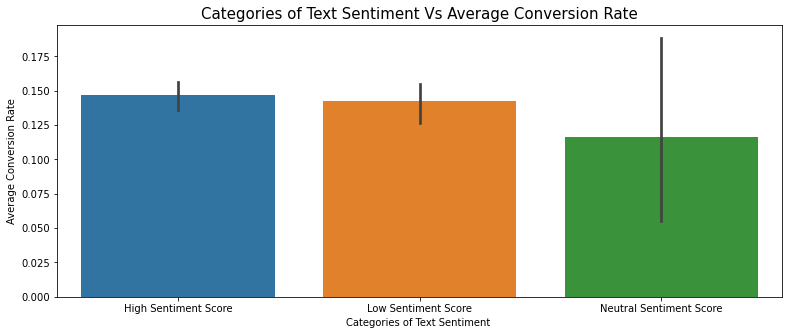

In [500]:
plt.figure(figsize = ( 13 , 5))
sns.barplot(x='Categories of Text Sentiment',y='Average Conversion Rate',data=df)
plt.xlabel( "Categories of Text Sentiment " , size = 10 )
plt.ylabel( "Average Conversion Rate" , size = 10 )
plt.title( "Categories of Text Sentiment Vs Average Conversion Rate" , size = 15 )
plt.show()

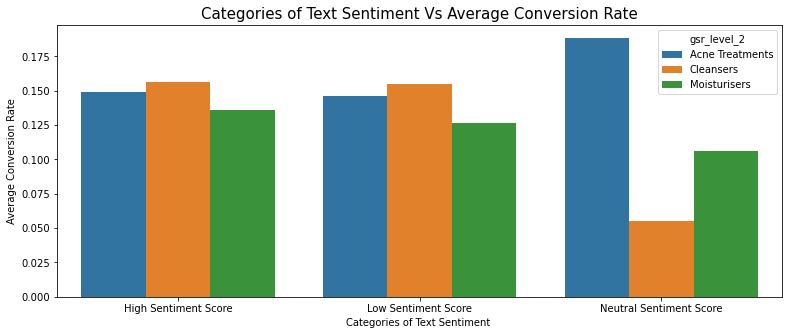

In [502]:
plt.figure(figsize = ( 13 , 5))
sns.barplot(x='Categories of Text Sentiment',y='Average Conversion Rate',data=df, hue='gsr_level_2')
plt.xlabel( "Categories of Text Sentiment " , size = 10 )
plt.ylabel( "Average Conversion Rate" , size = 10 )
plt.title( "Categories of Text Sentiment Vs Average Conversion Rate" , size = 15 )
plt.show()

In [445]:
df1=data_new.groupby(['gsr_level_2','Categories of Summary Sentiment'])[['conversion_rate_vc']].mean().reset_index()

In [446]:
df1

gsr_level_2 Categories of Summary Sentiment  conversion_rate_vc
0  Acne Treatments            High Sentiment Score            0.148380
1  Acne Treatments             Low Sentiment Score            0.171353
2  Acne Treatments         Neutral Sentiment Score            0.162935
3        Cleansers            High Sentiment Score            0.157886
4        Cleansers             Low Sentiment Score            0.141694
5        Cleansers         Neutral Sentiment Score            0.117420
6     Moisturisers            High Sentiment Score            0.145632
7     Moisturisers             Low Sentiment Score            0.111621
8     Moisturisers         Neutral Sentiment Score            0.121284

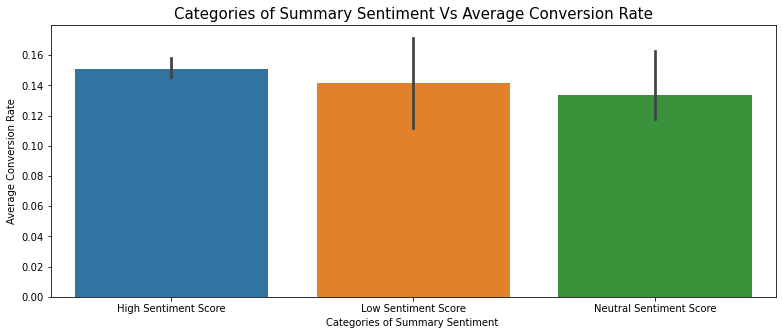

In [447]:
plt.figure(figsize = ( 13 , 5))
sns.barplot(x='Categories of Summary Sentiment',y='conversion_rate_vc',data=df1)
plt.xlabel( "Categories of Summary Sentiment " , size = 10 )
plt.ylabel( "Average Conversion Rate" , size = 10 )
plt.title( "Categories of Summary Sentiment Vs Average Conversion Rate" , size = 15 )
plt.show()

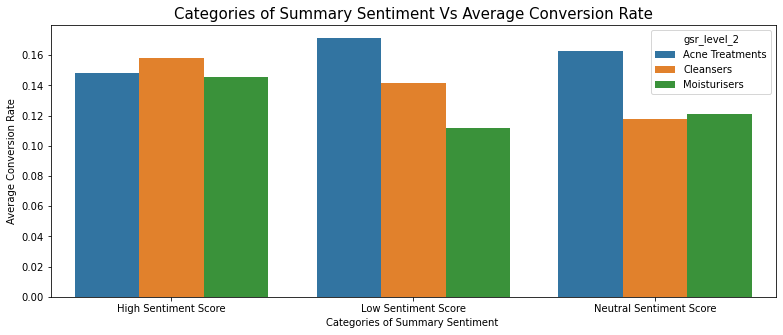

In [448]:
plt.figure(figsize = ( 13 , 5))
sns.barplot(x='Categories of Summary Sentiment',y='conversion_rate_vc',data=df1, hue='gsr_level_2')
plt.xlabel( "Categories of Summary Sentiment " , size = 10 )
plt.ylabel( "Average Conversion Rate" , size = 10 )
plt.title( "Categories of Summary Sentiment Vs Average Conversion Rate" , size = 15 )
plt.show()